In [1]:
import sacc
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import astropy.io.fits as pf

In [2]:
TXPipe = sacc.Sacc.load_fits('/global/homes/c/chihway/TXPipe/summary_statistics_real.sacc')
#TXPipe = sacc.Sacc.load_fits('/global/homes/c/chihway/TXPipe/data/example/outputs/summary_statistics_real.sacc')
Cosmosis = pf.open('/global/homes/c/chihway/txpipe-cosmodc2/cosmosis_config/summary_statistics_real_from_sacc_theory_wcov.fits')

In [3]:
# help(TXPipe.covariance)

In [4]:
print(TXPipe.get_tracer_combinations())
for i in range(10):
    print(Cosmosis['xip'].data['bin1'][i*20], Cosmosis['xip'].data['bin2'][i*20])

ids = np.arange(10)

Xibin1_txpipe = np.array([1,1,2,1,2,3,1,2,3,4])
Xibin2_txpipe = np.array([1,2,2,3,3,3,4,4,4,4])

Xibin1_cosmosis = np.array([1,1,1,1,2,2,2,3,3,4])
Xibin2_cosmosis = np.array([1,2,3,4,2,3,4,3,4,4])

ids2 = []
for i in range(10):
    mask = (Xibin1_txpipe == Xibin1_cosmosis[i]) * (Xibin2_txpipe == Xibin2_cosmosis[i])
    ids2.append(ids[mask][0])

print(ids2)

[('lens_0', 'lens_0'), ('source_0', 'lens_0'), ('source_1', 'lens_0'), ('source_2', 'lens_0'), ('source_3', 'lens_0'), ('source_0', 'source_0'), ('source_1', 'source_0'), ('source_1', 'source_1'), ('source_2', 'source_0'), ('source_2', 'source_1'), ('source_2', 'source_2'), ('source_3', 'source_0'), ('source_3', 'source_1'), ('source_3', 'source_2'), ('source_3', 'source_3')]
1 1
1 2
1 3
1 4
2 2
2 3
2 4
3 3
3 4
4 4
[0, 1, 3, 6, 2, 4, 7, 5, 8, 9]


/global/common/software/lsst/common/miniconda/py3-4.5.12/envs/stack/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/global/common/software/lsst/common/miniconda/py3-4.5.12/envs/stack/lib/python3.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


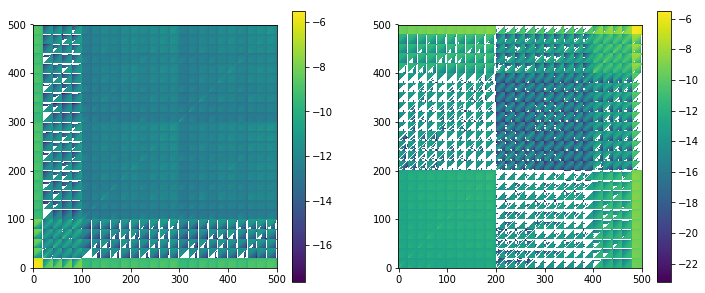

In [5]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(np.log10(TXPipe.covariance.covmat), origin='lower left')
plt.colorbar()
plt.subplot(122)
plt.imshow(np.log10(Cosmosis['covmat'].data), origin='lower left')
plt.colorbar()

In [6]:
print(Cosmosis['covmat'].header)

XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  500                                                  NAXIS2  =                  500                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               COVDATA =                    T                                                  EXTNAME = 'COVMAT  '                                                            STRT_0  =                    0                                                  NAME_0  = 'xip     '                                                            STRT_1  =                  200                                                  NAME_1  = 'xim     '                    

In [7]:
cov_txpipe = TXPipe.covariance.covmat
cov_cosmosis = Cosmosis['covmat'].data

In [8]:
theta_txpipe, xi  = TXPipe.get_theta_xi('galaxy_density_xi', 'lens_0', 'lens_0')
theta_cosmosis = Cosmosis['wtheta'].data['ang']

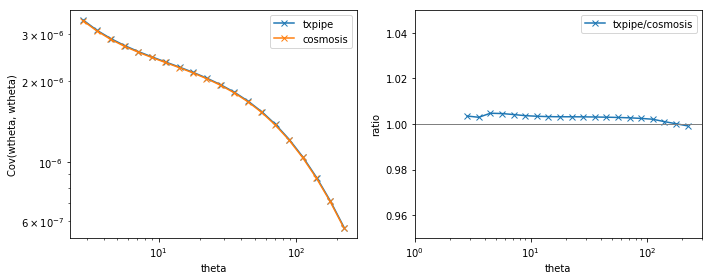

In [9]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.loglog(theta_txpipe, np.diag(cov_txpipe[:20,:20]), marker='x', label='txpipe')
plt.loglog(theta_cosmosis, np.diag(cov_cosmosis[480:,480:]), marker='x', label='cosmosis')
plt.xlabel('theta')
plt.ylabel('Cov(wtheta, wtheta)')
plt.legend()
plt.subplot(122)
plt.semilogx(theta_txpipe, np.diag(cov_txpipe[:20,:20])/np.diag(cov_cosmosis[480:,480:]), marker='x', label='txpipe/cosmosis')
plt.xlabel('theta')
plt.ylabel('ratio')
plt.ylim(0.95,1.05)
plt.plot([1,300],[1,1], color='grey', lw=1)
plt.xlim(1,300)
plt.legend()
plt.tight_layout()

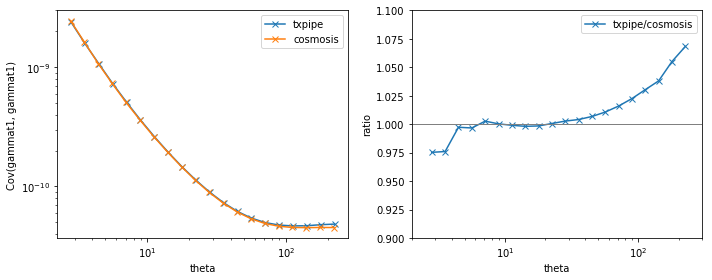

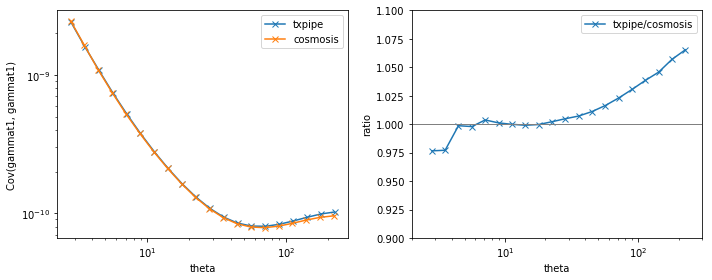

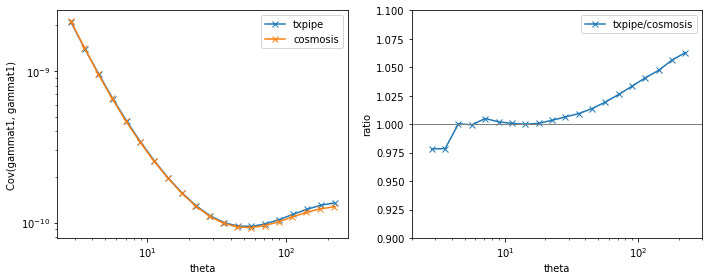

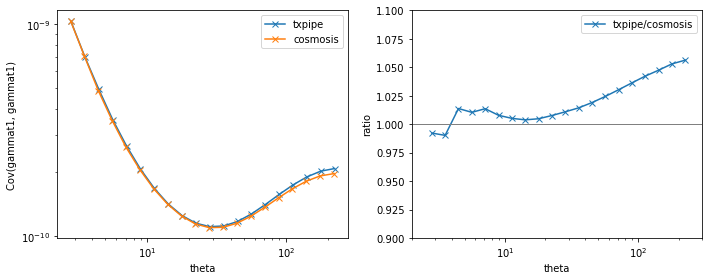

In [10]:
for i in range(4):
    plt.figure(figsize=(10,4))

    plt.subplot(121)
    plt.loglog(theta_txpipe, np.diag(cov_txpipe[20+i*20:40+i*20,20+i*20:40+i*20]), marker='x', label='txpipe')
    plt.loglog(theta_cosmosis, np.diag(cov_cosmosis[400+i*20:420+i*20,400+i*20:420+i*20]), marker='x', label='cosmosis')
    plt.xlabel('theta')
    plt.ylabel('Cov(gammat1, gammat1)')
    plt.legend()
    
    plt.subplot(122)
    plt.semilogx(theta_txpipe, np.diag(cov_txpipe[20+i*20:40+i*20,20+i*20:40+i*20])/np.diag(cov_cosmosis[400+i*20:420+i*20,400+i*20:420+i*20]), marker='x', label='txpipe/cosmosis')
    plt.xlabel('theta')
    plt.ylabel('ratio')
    plt.legend()
    plt.ylim(0.9,1.1)
    plt.plot([2,300],[1,1], color='grey', lw=1)
    plt.xlim(2,300)
    plt.tight_layout()

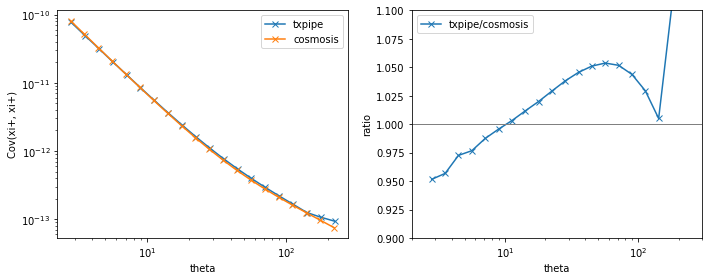

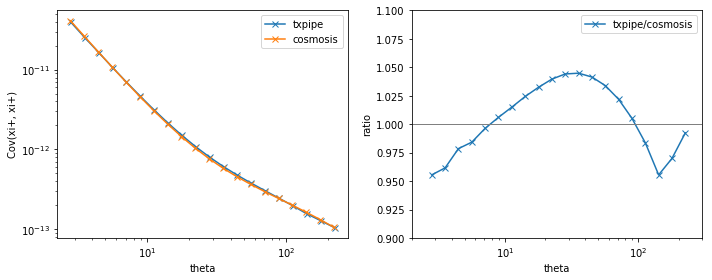

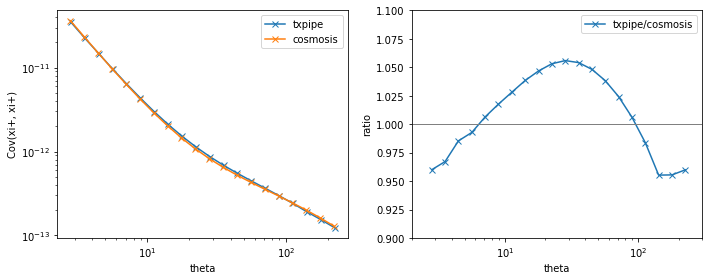

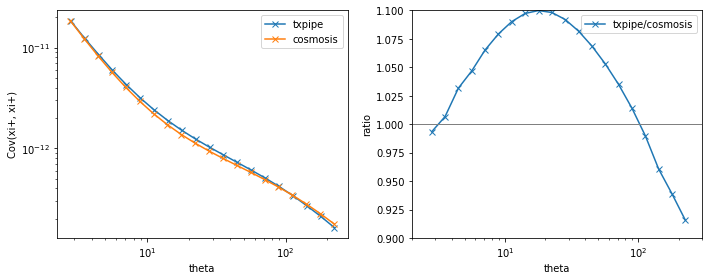

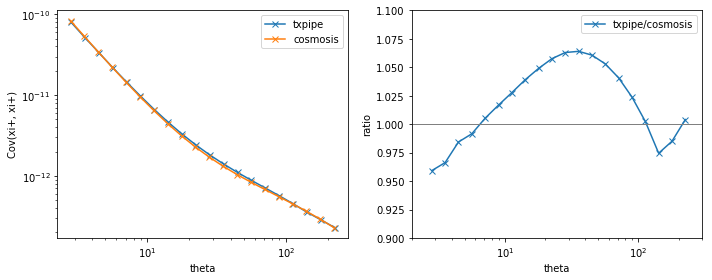

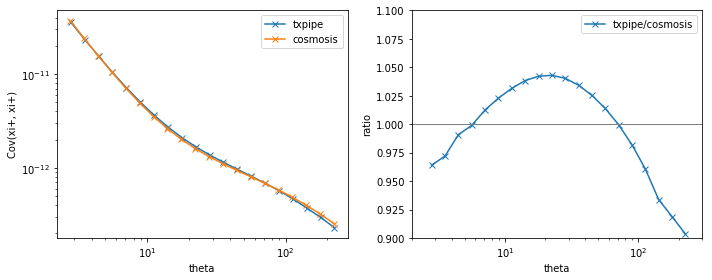

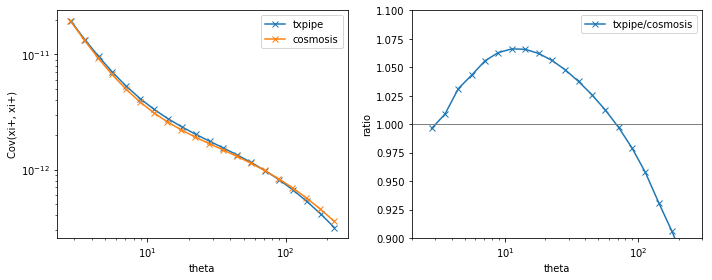

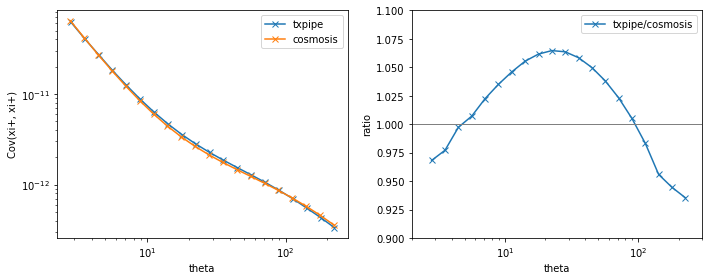

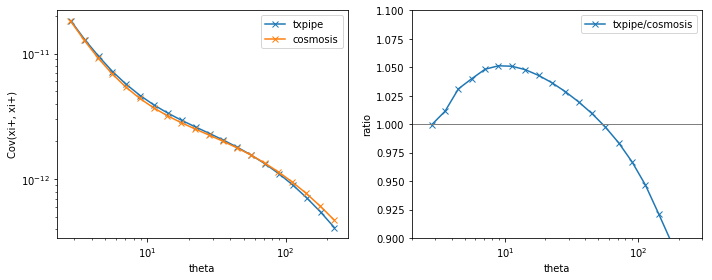

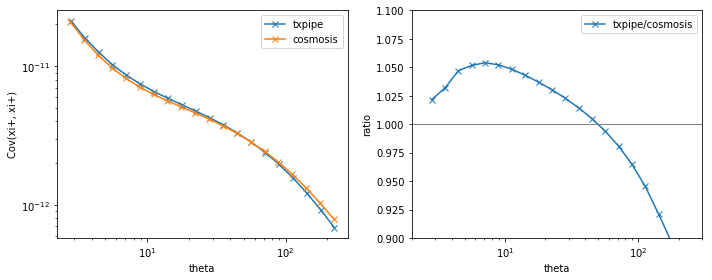

In [11]:
for i in range(10):
    plt.figure(figsize=(10,4))

    plt.subplot(121)
    plt.loglog(theta_txpipe, np.diag(cov_txpipe[100+ids2[i]*20:120+ids2[i]*20,100+ids2[i]*20:120+ids2[i]*20]), marker='x', label='txpipe')
    plt.loglog(theta_cosmosis, np.diag(cov_cosmosis[i*20:20+i*20,i*20:20+i*20]), marker='x', label='cosmosis')
#     plt.loglog(theta_txpipe, np.diag(cov_txpipe[100+i*20:120+i*20,100+i*20:120+i*20]), marker='x', label='txpipe')
#     plt.loglog(theta_cosmosis, np.diag(cov_cosmosis[i*20:20+i*20,i*20:20+i*20]), marker='x', label='cosmosis '+str(Xibin1_cosmosis[i])+' '+str(Xibin2_cosmosis[i]))

    plt.xlabel('theta')
    plt.ylabel('Cov(xi+, xi+)')
    plt.legend()
    
    plt.subplot(122)
    plt.semilogx(theta_txpipe, np.diag(cov_txpipe[100+ids2[i]*20:120+ids2[i]*20,100+ids2[i]*20:120+ids2[i]*20])/np.diag(cov_cosmosis[i*20:20+i*20,i*20:20+i*20]), marker='x', label='txpipe/cosmosis')
#     plt.semilogx(theta_txpipe, np.diag(cov_txpipe[100+i*20:120+i*20,100+i*20:120+i*20])/np.diag(cov_cosmosis[i*20:20+i*20,i*20:20+i*20]), marker='x', label='txpipe/cosmosis')

    plt.xlabel('theta')
    plt.ylabel('ratio')
    plt.legend()
    plt.ylim(0.9,1.1)
    plt.plot([2,300],[1,1], color='grey', lw=1)
    plt.xlim(2,300)
    plt.tight_layout()